# Timeseries analysis with Facebook Prophet
https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a

In [23]:
import numpy as np
import seaborn as sns
import pandas as pd
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt

#
# build 6 time series groups for testing, called: a, b, c, d, e, f
#

num_samples = 61
group_size = 10

#
# create the main time series for each group
#

x = np.linspace(0, 5, num_samples)
scale = 4

a = scale * np.sin(x)
b = scale * (np.cos(1+x*3) + np.linspace(0, 1, num_samples))
c = scale * (np.sin(2+x*6) + np.linspace(0, -1, num_samples))
d = scale * (np.cos(3+x*9) + np.linspace(0, 4, num_samples))
e = scale * (np.sin(4+x*12) + np.linspace(0, -4, num_samples))
f = scale * np.cos(x)

#
# from each main series build 'group_size' series
#

timeSeries = pd.DataFrame()
ax = None
for arr in [a,b,c,d,e,f]:
    arr = arr + np.random.rand(group_size, num_samples) + np.random.randn(group_size, 1)
    df = pd.DataFrame(arr)
    timeSeries = timeSeries.append(df)
    

print(timeSeries.head())


         0         1         2         3         4         5         6   \
0  1.803927  1.923717  2.138027  2.794426  3.048515  3.189375  3.853535   
1  1.790159  1.954594  2.508803  3.278435  2.952208  3.823194  4.004882   
2  0.062091  0.514647  0.561092  1.534657  1.556061  1.544518  2.109024   
3 -0.074387 -0.129069  0.522825  1.366243  1.615378  1.859689  1.927761   
4  0.948084  1.766856  2.005553  2.461431  2.502598  2.772009  3.234593   

         7         8         9   ...        51        52        53        54  \
0  3.973920  3.988490  4.659976  ... -1.836519 -2.503424 -2.669710 -2.604119   
1  4.271763  4.255697  4.484672  ... -1.443171 -1.957599 -2.485553 -2.457262   
2  2.882758  2.492327  2.884265  ... -3.456442 -2.956967 -3.226185 -3.461044   
3  2.300485  2.044722  2.696472  ... -3.785787 -3.493401 -4.076319 -3.810313   
4  3.878405  3.982330  4.224730  ... -2.388445 -2.134499 -2.152606 -2.999419   

         55        56        57        58        59        60  
0 -1

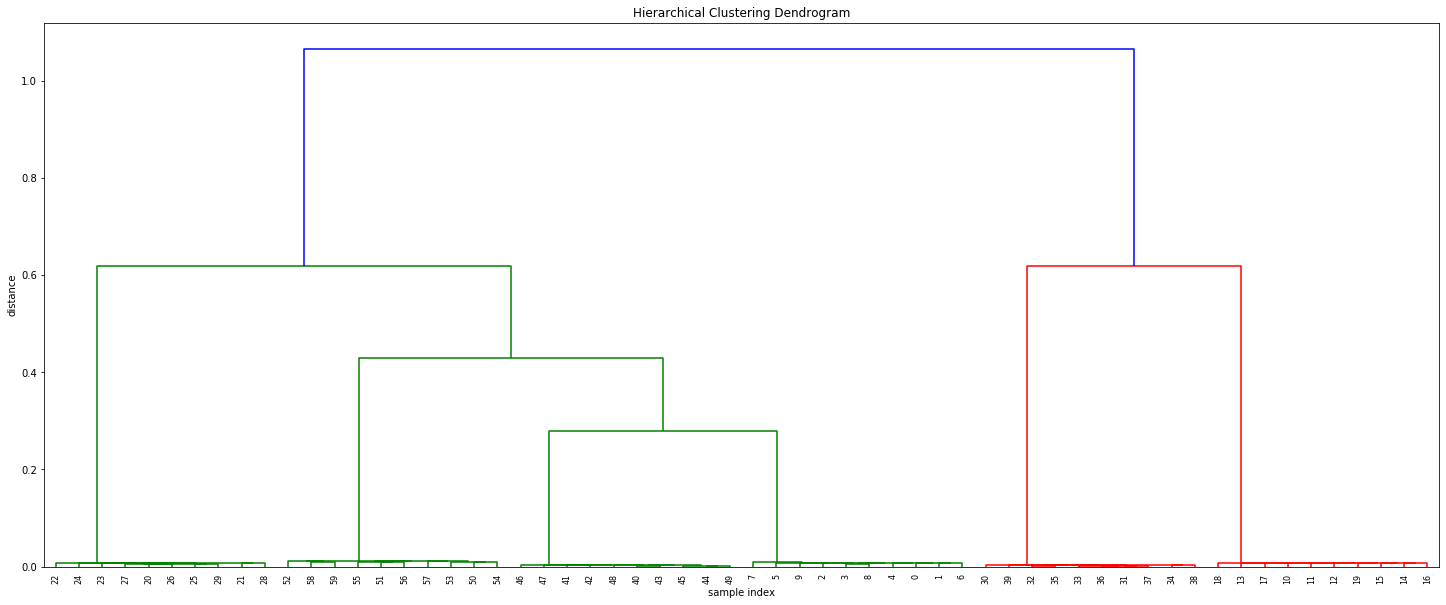

In [24]:
# Do the clustering
Z = hac.linkage(timeSeries, method='single', metric='correlation')

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

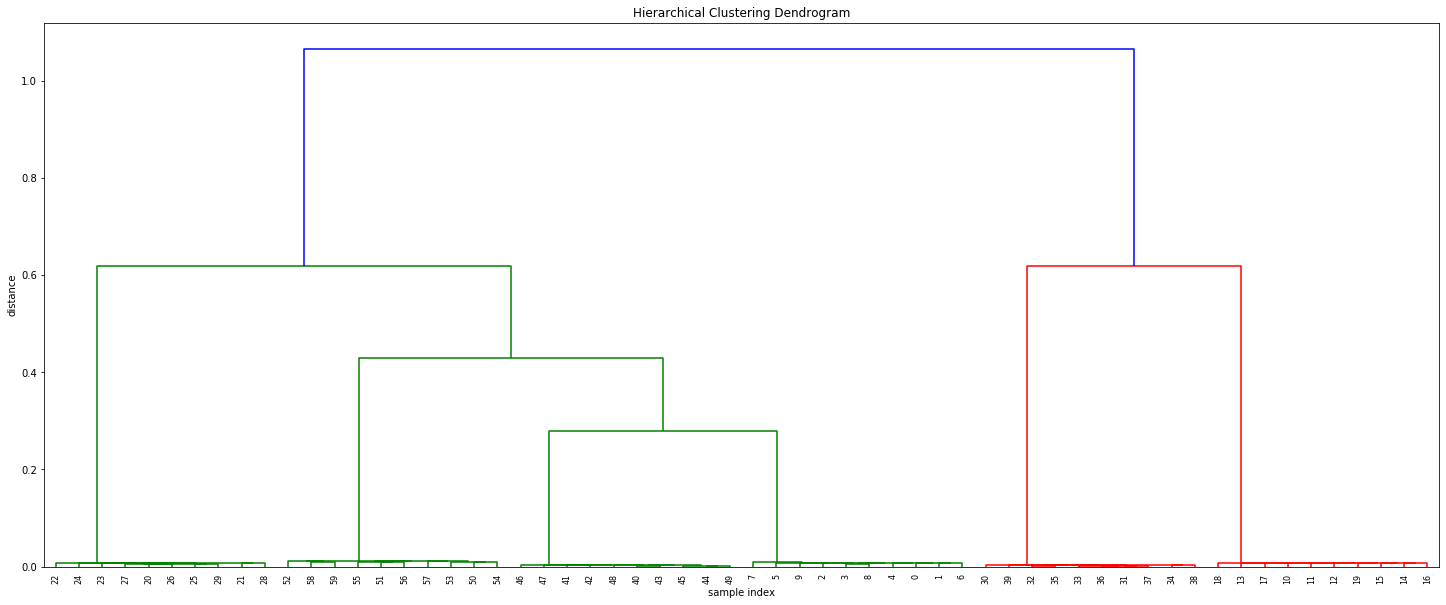

In [25]:
def my_metric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2

# Do the clustering    
Z = hac.linkage(timeSeries,  method='single', metric=my_metric)

# Plot dendogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
hac.dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster

def print_clusters(timeSeries, Z, k, plot=False):
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')

    # check the results
    s = pd.Series(results)
    clusters = s.unique()

    for c in clusters:
        cluster_indeces = s[s==c].index
        print("Cluster %d number of entries %d" % (c, len(cluster_indeces)))
        if plot:
            timeSeries.T.iloc[:,cluster_indeces].plot()
            plt.show()

print_clusters(timeSeries, Z, 6, plot=False)

Cluster 4 number of entries 10
Cluster 6 number of entries 10
Cluster 1 number of entries 10
Cluster 5 number of entries 10
Cluster 3 number of entries 10
Cluster 2 number of entries 10
